In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (10.0,8.0)
sns.set(style='whitegrid')
plt.rcParams['axes.axisbelow'] = True
sns.set_palette("Set3", 10)
sns.set_palette("bright")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Hypothesis Generation 

* Ho : There is no impact of particular feature on dependent variable (SalePrice)
* H1 : There is a direct impact of particular feature on SalePrice

Based on a decision criterion (say, 5% significance level), we always 'reject' or 'fail to reject' the null hypothesis in statistical parlance. Practically, while model building we look for probability (p) values. If p value < 0.05, we reject the null hypothesis. If p > 0.05, we fail to reject the null hypothesis. Some factors that directly influence house prices are the following:

* Area of House
* How old is the house
* Location of the house
* How close/far is the market
* Connectivity of house location with transport
* How many floors does the house have
* What material is used in the construction
* Water /Electricity availability
* Play area / parks for kids (if any)
* If terrace is available
* If car parking is available
* If security is available

# Exploratory Data Analysis

In [3]:
train.shape

(1460, 81)

Data set has 81 columns and 1460 rows 

In [4]:
train.columns[train.isnull().any()]# columns with null values 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
miss_val = (train.isnull().sum()/len(train))*100
miss_val = miss_val[miss_val>0]
miss_val = miss_val.sort_values(ascending = False)
miss_val

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [6]:
miss_val = pd.DataFrame(miss_val).reset_index()
miss_val = miss_val.rename(columns = {"index":'Columns',0:'% of missing Vals'})
miss_val

,Columns,% of missing Vals
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageYrBlt,5.547945
7,GarageType,5.547945
8,GarageFinish,5.547945
9,GarageQual,5.547945


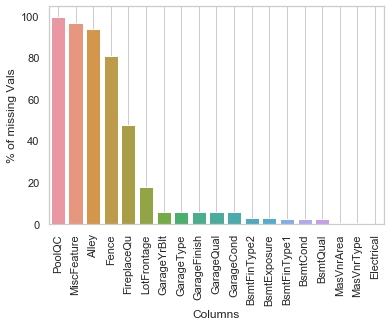

In [7]:
sns.barplot(miss_val['Columns'],miss_val['% of missing Vals'])
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10.0,8.0)
plt.grid()

6 columns have more than 10 % of missing values 

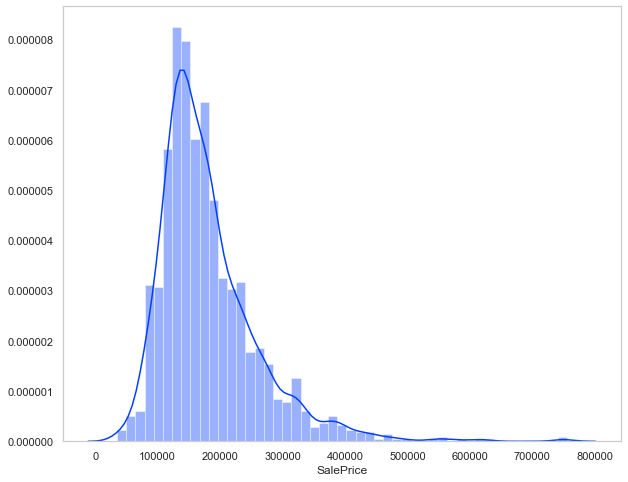

In [8]:
#SalePrice
sns.distplot(train['SalePrice'])
plt.grid()

the data is right skewed

Bring the Data into normal distribution to get appropriate predictions by applying log transformation

In [9]:
train.SalePrice.skew()

1.8828757597682129

0.12133506220520406


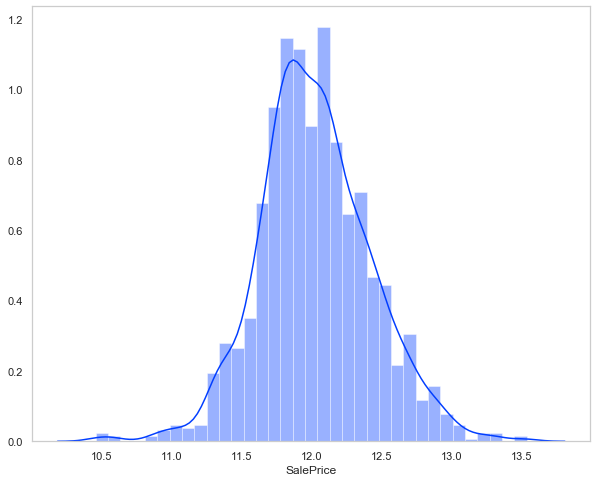

In [10]:
print((np.log(train.SalePrice)).skew())
sns.distplot(np.log(train.SalePrice))
plt.grid()

now the data has come closer to normal distribution 

# Spliting the data into categorical and numerical 

In [11]:
numerical = train.select_dtypes(include = [np.number])
categorical = train.select_dtypes(exclude = [np.number])

In [12]:
numerical.shape[1] # total no of numerical columns 

38

In [13]:
categorical.shape[1] # no of categorical columns

43

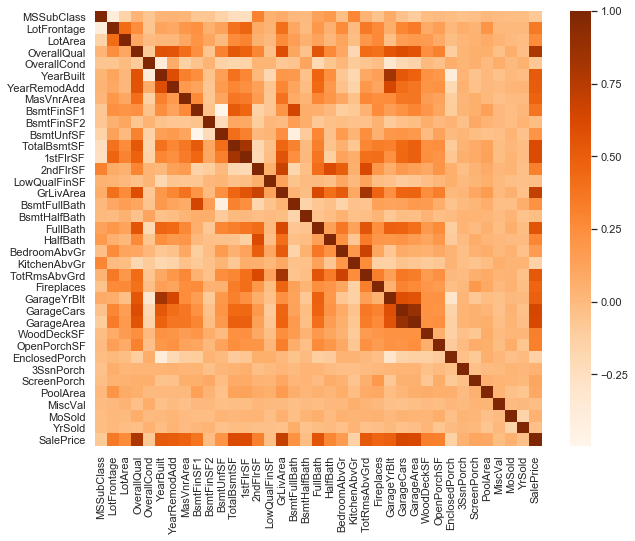

In [14]:
corrl = numerical.drop('Id',axis =1).corr()
sns.heatmap(corrl,cmap= 'Oranges')

* The last row of the Heat Map indicates that the most of the numerical columns are strongly correlated with the SalePrice
* there is a square 

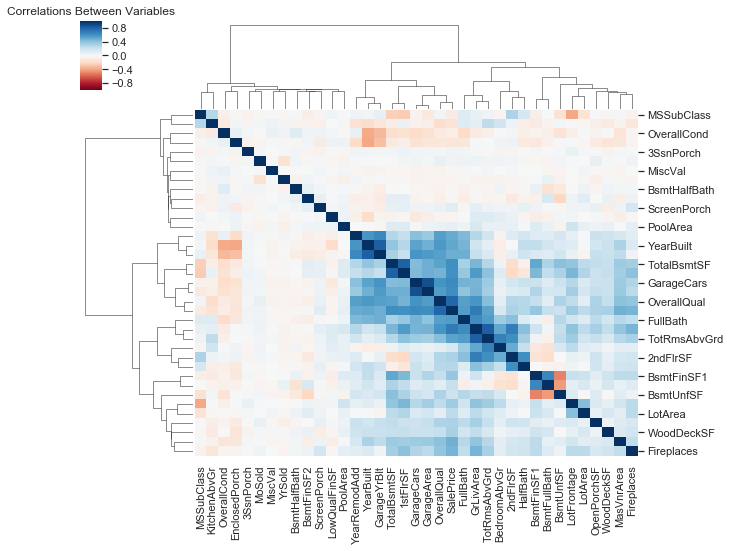

In [21]:
sns.clustermap(corrl, method='ward', cmap='RdBu',
               vmin=-1, vmax=1, figsize=(10,8))

plt.title("Correlations Between Variables")
#plt.tight_layout()
plt.show()

In [15]:
corrl['SalePrice'].sort_values(ascending =False)[:10] #top 10 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

'OverallQual' column has 79% correlation with sale price 

In [16]:
corrl['SalePrice'].sort_values(ascending =False)[-10:] # bottom 10 

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [17]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

data set has ratings range from 1 to 10 depending on the house quality

# Finding the average sale price of the house according to their 'OverallQual'

In [18]:
pvt = train.pivot_table(index='OverallQual',values="SalePrice",aggfunc=np.mean)
pvt=pvt.reset_index()

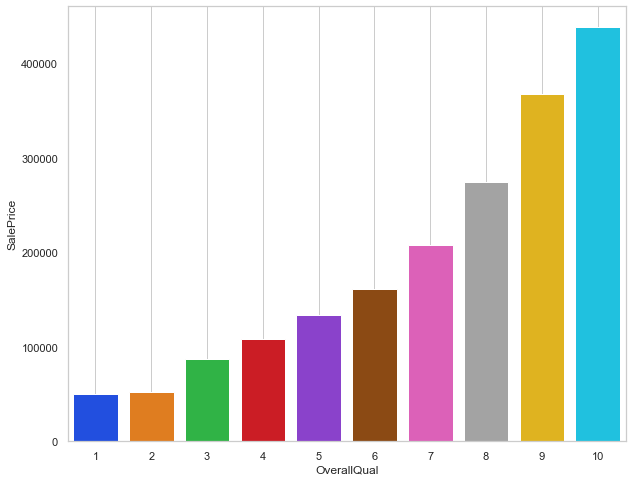

In [19]:
sns.barplot(pvt['OverallQual'],pvt['SalePrice'])#,color='yellow'
plt.grid()

This shows that more than Sale Price more the Overall Quality